# Spectral basis energy distribution
We computed the eigendecomposition of the cotan weigths Laplacian of a reference mesh and projected the $x$, $y$ and $z$ spatial coordinates of each vertices on the obtained basis.

The question is: **how is the energy of the mesh distributed in the spectral domain?**

In [28]:
%matplotlib inline  

import csv
import numpy as np
import matplotlib.pyplot as plt

def load_csv(filepath):
    lambdas = np.ndarray(0,)
    norms = np.ndarray(0,)
    with open(filepath, 'r') as f:
        csv_reader = csv.reader(f)
        for row in csv_reader:
            lambdas = np.hstack((lambdas, float(row[0])))
            norms = np.hstack((norms, float(row[1])))
    return lambdas, norms

The csv file `spectral_coeffs.csv` contains the norm of each spatial vector (vertex) $[x_i,y_i,z_i]$ projected independently along each coordinate on each vector of the spectral basis $E_i$

$$ a_i = \| [X, Y, Z]^T \cdot E_i \| ,$$

where $X = \{x_i\}$, $Y = \{y_i\}$, $Z = \{z_i\} \forall i=1,...,N$ and $E_i$ is a vector of the spectral basis.

In [29]:
x,y = load_csv('spectral_coeffs.csv')

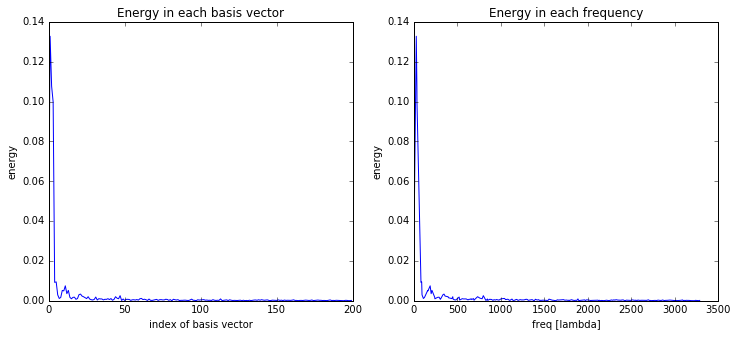

In [125]:
n_tot = x.shape[0]
#plt.plot(x[:n],y[:n])

n2 = 200

fig = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(y[:n2])
plt.ylabel('energy')
plt.xlabel('index of basis vector')
plt.title('Energy in each basis vector')

plt.subplot(122)
plt.plot(x[:n2],y[:n2])
plt.ylabel('energy')
plt.xlabel('freq [lambda]')
plt.title('Energy in each frequency')

In [126]:
total_energy = sum(y)
cumul_energy = np.divide(np.cumsum(y), total_energy)
# Find a threshold (in term of % of energy)
thresh = [0.9, 0.95, 0.98, 0.99]
id_thresh = [-1, -1, -1, -1]

for i,t in enumerate(thresh):
    a = cumul_energy > t
    a = np.nonzero(a)
    id_thresh[i] = a[0][0]
    print 'Number of basis to explain %d percent of total energy = %d' % (t*100., id_thresh[i])
    print 'Cutoff frequency to explain %d percent of total energy = %d' % (t*100., x[id_thresh[i]])
    print '---'
id_thresh = id_thresh[2]

Number of basis to explain 90 percent of total energy = 594
Cutoff frequency to explain 90 percent of total energy = 8805
---
Number of basis to explain 95 percent of total energy = 1767
Cutoff frequency to explain 95 percent of total energy = 23095
---
Number of basis to explain 98 percent of total energy = 3782
Cutoff frequency to explain 98 percent of total energy = 56959
---
Number of basis to explain 99 percent of total energy = 5550
Cutoff frequency to explain 99 percent of total energy = 103643
---


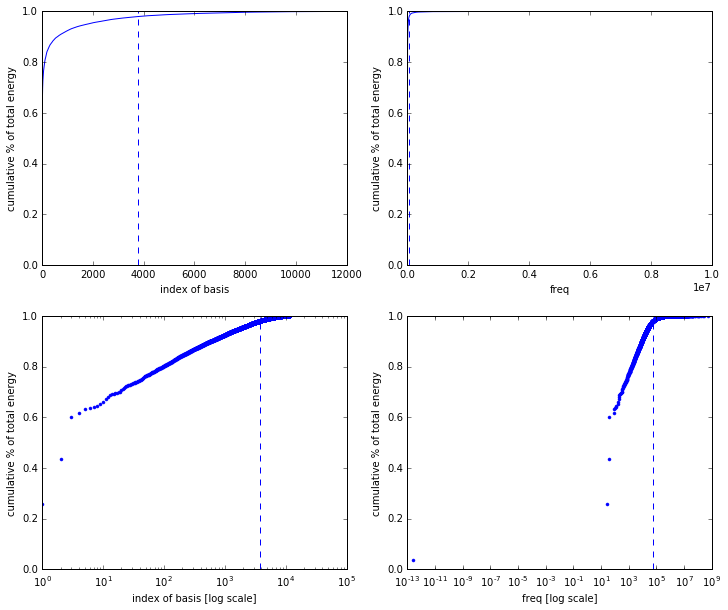

In [122]:
fig = plt.figure(figsize=(12,10))
plt.subplot(221)
plt.plot(cumul_energy)
plt.axvline(x=id_thresh, linestyle='--')
plt.ylabel('cumulative % of total energy')
plt.xlabel('index of basis')
plt.subplot(222)
plt.plot(x[:-100], cumul_energy[:-100])
plt.axvline(x=x[id_thresh], linestyle='--')
plt.ylabel('cumulative % of total energy')
plt.xlabel('freq')
# log scale
plt.subplot(223)
plt.semilogx(cumul_energy, '.')
plt.axvline(x=id_thresh, linestyle='--')
plt.ylabel('cumulative % of total energy')
plt.xlabel('index of basis [log scale]')
plt.subplot(224)
plt.semilogx(x, cumul_energy,'.')
plt.axvline(x=x[id_thresh], linestyle='--')
plt.ylabel('cumulative % of total energy')
plt.xlabel('freq [log scale]')